# Prosjekt 2 VitBer
Martin Johnsrud, Hans Giil, Eirik Høydalsvik

### Teori
(Her er alltid $j$ indeks for $x$, mens $k$ er ineks for energier)

Vi skal lage en algoritme som tar i et potensialet $V(x)$, hvor vi antatr $V(x) = \infty, x \in [-\infty, 0> \cup <L, \infty]$, mens det kan ha en virkårlig form i intervallet $I = [0, L>$. $I$ Diskretiseres opp i $n$ delintervaller, $\{I_j\}_{j = 1} ^ {n}$, med lengder på $\Delta x = L / (n + 1)$. Vi diskretiserer derreter potensialet ved å sette $V_j = V(\Delta x \cdot j), \, j = 1, 2, ... n$ og grensebetingelsene $V_0 = V_{n+1} = \infty$, slik at vi har en vektor ${\vec V} = [V_1, V_2, ... V_{n + 1}]$. Den tidsuavhengige Shrödingerligningen i 1D, TUSL, er gitt ved 

$$ \hat H \psi(x) =  \Big( - \frac{\hbar}{2m} \frac{\partial}{\partial x} + \hat V\Big) \psi(x) = E \psi(x) $$

Vi diskretiserer $\psi(x)$ på samme måten, og lar $\psi_j = \psi(\Delta x \cdot j),\, \psi_0 = \psi_{n+1} = 0$ som gir vektoren $\vec \psi$. Hamiltonoperatoren tilnærmes med matrisen $\mathbb{H} = [H_{j, k}]$, som er tri-diagonal, slik at

$$
\mathbb{H}=
\begin{bmatrix}
    H_{1, 1} & H_{1, 2} & 0        & 0          & \dots      & 0            \\[1mm]
    H_{2, 1} & H_{2, 2} & H_{2, 3} & 0          &            & \vdots       \\[1mm]
    0        & H_{3, 2} & \ddots   & \ddots     & 0          & 0            \\[1mm]
    0        & 0        & \ddots   & \ddots     & H_{n-1, n} & 0            \\[1mm]
    \vdots   &          & 0        & H_{n, n-1} & H_{n, n}   & H_{n, n+1}   \\[1mm]
    0        & \dots    & 0        & 0          & H_{n+1, n} & H_{n+1, n+1} \\[1mm]
 \end{bmatrix}
$$

hvor $H_{j, j} = \frac{\hbar^2}{2m\Delta x} + V_j$, og $H_{j, j\pm 1} = -\frac{\hbar^2}{2m\Delta x}$. TUSL kan da aproskimeres som et egenverdiproblem,

$$ \mathbb{H} \vec \psi_k = E_k \vec \psi_k$$

Dette gir $n$ forskjellige egenverdier $E_j$, med tilhørende egenvektorer $\vec \psi_k = \psi_{j, k}$, hvor den  som er en aproksimasjon av egenfunksjonen til den . Derreter kan vi tidsutvikle en vilkårilg starttilstand $\Psi (x, 0)$. Denne starttilstanden aproksimeres som en superposisjonen av egenvektorene, 

$$\Psi_j = \sum_{k = 1}^{n} c_{k} \psi_{j, k} \exp(-i E_k t / \hbar),$$

eller med matrisenotasjon $\psi = [\psi_{j, k}], \, \vec c = [c_1, c_2, ... c_{n+1}]$ blir det $\vec \Psi(t) = \psi (\vec c \cdot \exp(i t / \hbar \vec E)) $. $\vec c$ finnes ved $c_j = \sum_{j = 1}^{n + 1} \psi_{j, k} \Psi_j$, eller $\vec c = \vec \Psi^T \psi$ 

**Notasjon**

$V(x) =$ `VKont(x)`<br>
$\Delta x$ = `deltaX`<br>
$n$ = `n`<br>
$\vec V$ = `V` <br>
$\mathbb{H} = $ `H[j][k]` <br>
$\psi = $ `psi[j][k]` <br>
$c = $ `c[k]` <br>
$\Psi(x, 0) = $ `f(x)` <br>
$\vec \Psi(t) = $ `Psi[j](t)` <br>


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# Lengden av intervallet
L = 1
# antall subintervaller
n = 1000
# Fjerkonstanten
K = 1
hbar = 1
deltaX = L / (n + 1)
x = np.linspace(0, L, n + 1)
indexes = np.linspace(0, n + 1)

def getEigenvalues(V, x, n):
    # Hjj are diagonal values, HOD are of the diagonal
    H = np.zeros((n + 1, n + 1))
    Hjj = hbar**2 / (m * deltaX**2)* np.ones(n + 1) + V
    HOD= -hbar**2 / (2 * m * deltaX**2) * np.ones(n)
    
    return la.eigh_tridiagonal(Hjj, HOD)

## Partikkel i boks

Energies: 

-9.819886402882842 4.934802200544679
-9.280128255675102 19.739208802178716
-8.382621340571685 44.41321980490211
-7.131124590394494 78.95683520871486
-5.532703176745129 123.37005501361698


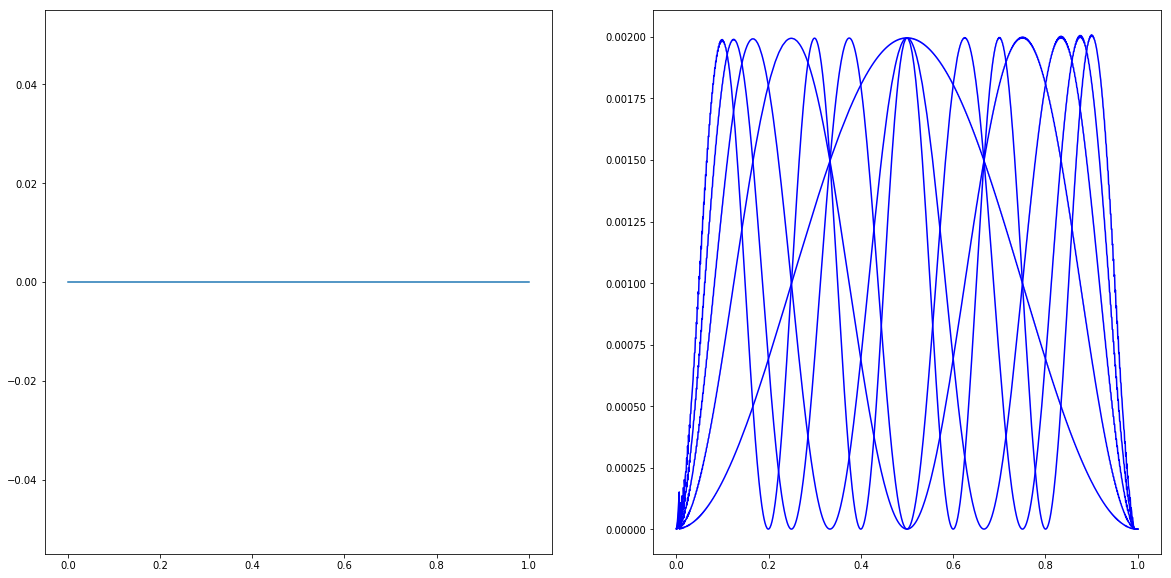

In [144]:
V0 = 0

V = np.concatenate(( np.ones(n // 2 + 1) * V0, np.zeros(n - (n // 2))))

def EExact(j):
    return hbar * ((j + 1)*np.pi/L)**2 / (2*m) - V[j]

getEigenvalues(V, x, n)

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].plot(x, V)
print("Energies: ")
print()
for i in range(5):
    print(E[i], EExact(i))
    axs[1].plot(x, psi[i, :]**2, color="blue")
